In [3]:
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

#shows visualization in line -> replaces plt.show
%matplotlib inline

In [4]:
col_names = ['Test A', 'Test B', 'Result']
dt = pd.read_csv('https://tinyurl.com/y4ns8pqm', names=col_names)

print("Shape: ", dt.shape)
dt.head()


Shape:  (100, 3)


,Test A,Test B,Result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
X = dt.iloc[:,:-1].values
y = dt.iloc[:,-1].values

print("X: \n", X[0:5])
print("y: \n",y[0:5])

X: 
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
y: 
 [0 0 0 1 1]


Text(0, 0.5, 'TestB')

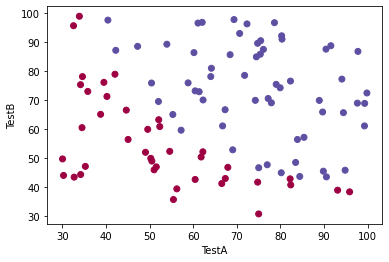

In [6]:
X1 = dt.iloc[:,0].values
X2 = dt.iloc[:,1].values

plt.scatter(X1, X2, c=y, cmap="Spectral")
plt.xlabel('TestA')
plt.ylabel('TestB')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [14]:
#LogisticRegression
model = LogisticRegression()
log_reg = model.fit(X_train, y_train)

In [25]:
y_test_pred = model.predict(X_test)

THRESHOLD = 0.34
preds = np.where(model.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

print("y_test_pred: \n", y_test_pred)
print("\n")
print("y_test: \n", y_test)
print("\n")
print("preds: \n", preds)

y_test_pred: 
 [0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0]


y_test: 
 [1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0]


preds: 
 [1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0]


In [29]:
#testing acuracy of the model
acc = model.score(X_test, y_test)
print("Model accuracy with predefined threshold: \n", acc)

print("\n")

acc1 = accuracy_score(y_test, preds)
print("Model accuracy1 with threshold set to 0.4: \n", acc1)

Model accuracy with predefined threshold: 
 0.84


Model accuracy1 with threshold set to 0.4: 
 0.92


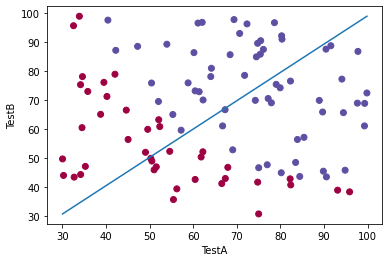

In [30]:
plt.scatter(X1.ravel(), X2, c=y, cmap="Spectral")
plt.xlabel('TestA')
plt.ylabel('TestB')


x_values = [np.min(X1), np.max(X1)]
#y_values needs to be fixed
y_values = [np.min(X2), np.max(X2)]
plt.plot(x_values, y_values, label='Decision Boundary')



In [31]:
#The first column is the probability of the predicted output being zero
#The second column is the probability that the output is one

model.predict_proba(X_test[0:5])

array([[5.16830891e-01, 4.83169109e-01],
       [6.74710414e-01, 3.25289586e-01],
       [9.55677076e-01, 4.43229244e-02],
       [9.52262973e-01, 4.77370267e-02],
       [1.20269951e-04, 9.99879730e-01]])